# PROJECT : NO-SHOW APPOINTMENTS

## TABLE OF CONTENTS
1. Introduction
2. Dataset Information
3. Questions
4. Data Wrangling
    - Import necessary libraries
    - Load the dataset
    - Analyse the dataframe
    - Cleaning the Data 
5. Exploratory Data Analysis
6. Conclusion
7. Limitation

## INTRODUCTION

In this project, I will analyze No Shows Appointment Dataset and state my findings about it using Python libraries like Pandas, NumPy, Matplotlib, and seaborn. The dataset collects information from 110k patients appointments in Brazil. The analysis will focus mainly on no show apppintment i.e. maybe the patients showed up for not for their medical appointments.

## DATA INFORMATION

Important information of each patient registered for appointment is listed below

PatientId: Identify code of a patient.

AppointmentID: Identify code of each appointment.

Gender: Male (M) or Female (F).

ScheduledDay: The day someone called or registered the appointment, before appointment.

AppointmentDay: The day of the actual appointment, when they have to visit the doctor.

Age: Age of the patient.

Neighbourhood: Where the appointment takes place.

Scholarship: True (1) of False (0).

Hipertension: True (1) or False (0).

Diabetes: True (1) or False (0).

Alcoholism: True (1) or False (0).

Handicap: The handicap refers to the number of desabilites a person has. 

SMS_received: 1 or more messages sent to the patient.

No-show: Yes or No., maybe the patient showed up or not

## QUESTIONS
1. Does the Neighbourhood has effect on patient's no-show?
2. What is the percentage of People that showed up against does that didnt show up?
3. What age group show up more for appointment?
4. What gender showed up most for the appointment?
5. Does scholarship affect no-show?

## DATA WRANGLING

## Import necessary libraries for the project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [5]:
Appointment = pd.read_csv('C:\\Users\\MASTER\\Downloads\\noshowappointments-kagglev2-may-2016.csv')
Appointment.head().T

,0,1,2,3,4
PatientId,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0
AppointmentID,5642903,5642503,5642549,5642828,5642494
Gender,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
Scholarship,0,0,0,0,0
Hipertension,1,0,0,0,1
Diabetes,0,0,0,0,1


## Check for the detail of the dataset

In [89]:
Appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Number of Unique Values

In [90]:
Appointment.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Clean the dataset, inspect for all missing data, wrong data, wrong data format etc.

### Check for Duplicated data

In [91]:
sum(Appointment.duplicated())

0

### Clean up incorrect data types

In [130]:
# convert string to datetime and keep only the date
columns = ['ScheduledDay', 'AppointmentDay']
for column in columns:
    Appointment[column] = pd.to_datetime(pd.to_datetime(Appointment[column]).dt.date)
    
print(Appointment.dtypes)
Appointment.head(3)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [94]:
Appointment["ScheduledDay"].isnull().sum()

0

In [95]:
Appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [96]:
Appointment.drop(['PatientId','ApppointmentID','SMS_received'], axis=1, inplace=True, errors='ignore')
Appointment.shape

(110527, 12)

### Renaming Columns

In [26]:
#Rename the No-show column
Appointment.rename({'Hipertension': 'Hypertension'}, axis=1, inplace=True)
Appointment.rename({'Handcap': 'Handicap'}, axis=1, inplace=True)
Appointment.rename({'Handcap': 'Handicap'}, axis=1, inplace=True)

In [27]:
#Create a function to rename some columns
def mod_string(col):
    """modifies a given string"""
    if 'Day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    col = col.strip().replace('-','_') # for example: No-show -> no_show
    return col
    
Appointment.rename(columns = lambda x: mod_string(x), inplace=True)
list(Appointment.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'Scheduled__Day',
 'Appointment__Day',
 'Age',
 'Neighbourhood',
 'Age_group',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'No_show',
 'Made_It',
 'Not_Made_It']

In [9]:
Appointment.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
PatientId,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0,95985133231274.0,733688164476661.0,3449833394123.0,56394729949972.0,78124564369297.0,...,5574942418928.0,72633149253362.0,65423877893936.0,996997666245785.0,36355337746436.0,2572134369293.0,3596266328735.0,15576631729893.0,92134931435557.0,377511518121127.0
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,...,5780122,5630375,5630447,5650534,5651072,5651768,5650093,5630692,5630323,5629448
Gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
Scheduled_Day,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z,2016-04-27T08:36:51Z,2016-04-27T15:05:12Z,2016-04-27T15:39:58Z,2016-04-29T08:02:16Z,2016-04-27T12:48:25Z,...,2016-06-07T07:38:34Z,2016-04-27T15:15:06Z,2016-04-27T15:23:14Z,2016-05-03T07:51:47Z,2016-05-03T08:23:40Z,2016-05-03T09:15:35Z,2016-05-03T07:27:33Z,2016-04-27T16:03:52Z,2016-04-27T15:09:23Z,2016-04-27T13:30:56Z
Appointment_Day,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,...,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z
Age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
Scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hypertension,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get the Correlation between each metric of the data

In [10]:
# Use .corr() to calculate the correlation, this will give an insight of the all dataset
Appointment.corr()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [11]:
Appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
Appointment.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
##Correct the negative age (-1)
Age_median = Appointment['Age'].median()
Appointment[Appointment['Age'] <= 0] = Age_median

In [14]:
Appointment.describe().Age

count    110527.000000
mean         38.273933
std          22.104720
min           1.000000
25%          20.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### Create Age group column for 4 age-class

In [15]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]
# labels for 4 age class
bin_names = ['0-18','19-37','38-55','56 and above']
Age_group = pd.cut(Appointment['Age'], bin_edges, labels=bin_names)
# New column is for Age group
Appointment.insert(7, 'Age_group', Age_group)
Appointment.head().T

,0,1,2,3,4
PatientId,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0
AppointmentID,5642903,5642503,5642549,5642828,5642494
Gender,F,M,F,F,F
Scheduled_Day,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z
Appointment_Day,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
Age_group,56 and above,56 and above,56 and above,0-18,56 and above
Scholarship,0,0,0,0,0
Hypertension,1,0,0,0,1


## Get the number of female(F) and male(M) that are present in the data

In [16]:
sum(Appointment['Gender']== 'M')

36869

### There are 38,686 males of different ages

In [17]:
sum(Appointment['Gender']== 'F')

70118

### There are 71,839 females of different ages

### How many people show up for their appointment?

In [18]:
Appointment['No_show'].value_counts()

No      85307
Yes     21680
37.0     3540
Name: No_show, dtype: int64

In [19]:
Appointment['Hypertension'].value_counts()

0     85186
1     21801
37     3540
Name: Hypertension, dtype: int64

### 88,208 people showed up for their appointment while 22,319 people didn't show up for their apppointment

In [20]:
Appointment.No_show[Appointment['No_show'] == 'Yes'] = '1'
Appointment.No_show[Appointment['No_show'] == 'No'] = '0'
Appointment['No_show'] = pd.to_numeric(Appointment['No_show'])

C:\Users\MASTER\AppData\Local\Temp\ipykernel_15352\2211143020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Appointment.No_show[Appointment['No_show'] == 'Yes'] = '1'
C:\Users\MASTER\AppData\Local\Temp\ipykernel_15352\2211143020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Appointment.No_show[Appointment['No_show'] == 'No'] = '0'


In [21]:
###People who made it for the appointment
Made_It = Appointment['No_show'] == 0
Not_Made_It = Appointment['No_show'] == 1
Appointment['Made_It'] = Made_It
Appointment['Not_Made_It'] = Not_Made_It

In [24]:
Appointment['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
37.0                           3540
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 82, dtype: int64

In [ ]:
Appointment['Age'].value_counts()

In [27]:
Females = sum(Appointment['Gender']== 'F')
Males = sum(Appointment['Gender']== 'M')
Population = (Females, Males)
Population

(70118, 36869)

In [45]:
Appointment['Gender'].isnull().sum()

0

In [44]:
Appointment['No_show'].value_counts()

0.0     85307
1.0     21680
37.0     3540
Name: No_show, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [121]:
Appointment['Neighbourhood'].value_counts().plot(kind='bar', figsize= (150,150));
plt.grid(True);
plt.title("Location Distribution of all Patients", fontsize = 200);
plt.xlabel('Neighbourhood', fontsize=200);
plt.ylabel('Number of Patients', fontsize=200);

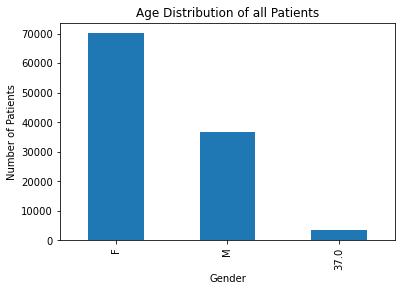

In [25]:
Appointment['Gender'].value_counts().plot(kind= 'bar')
plt.xlabel('Gender');
plt.ylabel('Number of Patients');
plt.title("Age Distribution of all Patients");

## The Relationship between Patients that showed up and those that didn't

77.18204601590561


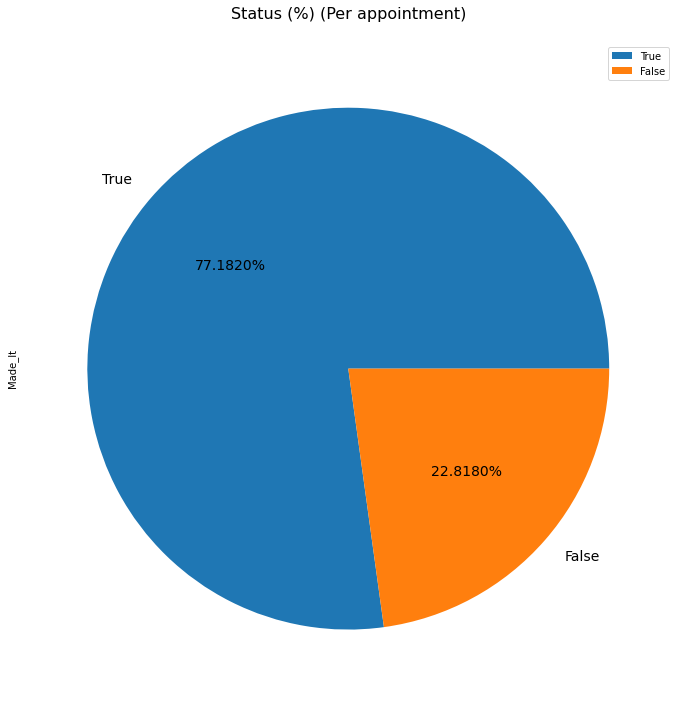

In [60]:
All_Patients = Appointment['Made_It'].value_counts()
print(All_Patients[1] / All_Patients.sum() * 100)
pieChart = All_Patients.plot.pie(figsize=(12,12), autopct='%4.4f%%', fontsize = 14);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 16);
plt.legend();

###### Approximately 77% of the scheduled patients showed up for their appointments

# What age showed up most for appointment?

In [47]:
A=Appointment.Age[Made_It].mean()
B=Appointment.Age[Not_Made_It].mean()
A,B

(39.07518726482, 35.329151291512915)

### Grouping all patients by Age Group

(19-37           30790
 56 and above    27504
 38-55           26906
 0-18            25327
 Name: Age_group, dtype: int64,
 <AxesSubplot:ylabel='Age_group'>)

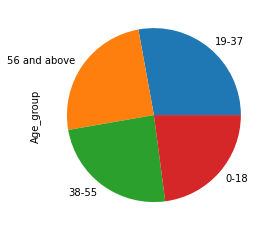

In [116]:
Group_figure = Appointment['Age_group'].value_counts()
Group_diagram = Appointment['Age_group'].value_counts().plot(kind="pie");
(Group_figure, Group_diagram)

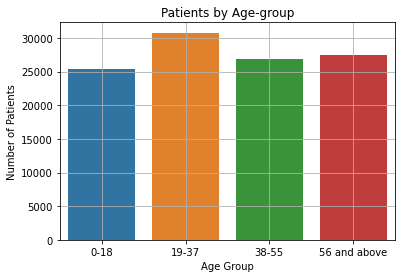

<Figure size 576x288 with 0 Axes>

In [119]:
sns.countplot(data=Appointment, x='Age_group');
plt.grid(True);
plt.title('Patients by Age-group');
plt.xlabel('Age Group');
plt.ylabel('Number of Patients');
plt.figure(figsize = [8, 4]);
plt.show()

Patients between 0-18 years old had the largest population, followed by age group 56 and above, then ages 19-37. least age group that got registered for appointment were the 38-55

##### RELATIONSHIP BETWEEN GENDER AND PATIENT POPULATION THAT SHOWED UP

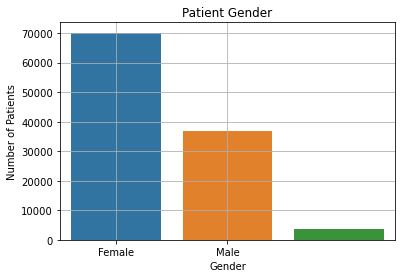

In [120]:
sns.countplot(data=Appointment, x='Gender');
plt.grid(True);
plt.title('Patient Gender');
plt.xticks([0,1],['Female','Male']);
plt.xlabel('Gender');
plt.ylabel('Number of Patients');

#From the plot above, it can be concluded that the number of female patients registered is more than male

# CONCLUSIONS:

1. The dataset contained 110,527 appointments in 40 days.
2. About 77% of the patients show up
3. Most patients :
    a.  were young and and average age of 37 years
    b.  were females and didn't have scholarship
    c.  scheduled their appointments the same day
    d.  that missed appointments were young
4. Top 2 neighbourhoors that got appointments were Jardim Camburi and Maria Ortiz
5. The provided dataset is not sufficient to determine the effect of Neighbourhood on number of no-show patients

### The following questions were answered

# Limitations

1. The dataset is old, a recent dataset would have been much better
2. The dataset only cover a few days, 40 days, longer days data would have given more insights